# Bases de Python

Objectifs :

- introduction à numpy
- indexage et sélection
- opérations vectorielles
- fonctions
- introduction à matplotlib
- représentations graphiques

# Numpy

Le module Numpy définit le type ndarray. Il est optimisé pour des structures de données homogènes (les éléments sont du même type) et de tailles fixes. Vous trouverez sur https://numpy.org/doc/ la documentation complète.

Souvent, on importe Numpy en lui donnant le nom "np" pour simplifier l'écriture de codes.

In [93]:
import numpy as np

**Création.**
Pour créer un tableau en Numpy, on peut tout d'abord rentrer directement ses éléments :

In [99]:
array0 = np.array([0,1,2,3]) # vecteur ligne d'entiers (0,1,2,3)
array1 = np.array([[0],[1],[2],[3]]) # vecteur colonne d'entiers (0,1,2,3)^T
array2 = np.array([[1.1,2.2,3.3,4.4],[1,2,3,4]]) # matrice de taille 2x4 de flottants
array3 = np.array([[1+1j,0.4],[3,1.5]]) # matrice complexe de taille 2x2
array1   # Affiche array1

array([[0],
       [1],
       [2],
       [3]])

On peut également générer des tableaux à l'aide de fonctions de Numpy. La fonction `np.zeros` créé un tableau rempli de $0$, et `np.ones` créé un tableau rempli de $1$. Il faut spécifier en plus la taille, et optionnellement le type :

In [95]:
array4 = np.zeros(3, dtype=int) # vecteur de 3 entiers
array5 = np.zeros((2,4), dtype=float) # tableau de flottants de taille 2x4
array6 = np.zeros((2,2), dtype=complex) # matrice carrée complexe de taille 2x2
array7 = np.ones((5,6,4)) # tableau tridimensionnel de flottants dont les éléments valent tous 1
print(array6)   # Affiche array6

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


**Accès aux éléments d'un tableau.**
Les commandes suivantes permettent d'accéder aux éléments des tableaux :

In [104]:
array0[1] # retourne 1
array1[3,0] # retourne 3
array2[1] # retourne la première ligne de array2 qui est (1,2,3,4)

array([1., 2., 3., 4.])

Attention ! Nous venons de voir qu'en Python, on compte à partir de 0.

**Modification d'un tableau.**
Les tableaux Numpy sont mutables dans le sens où les éléments peuvent être modifiés mais en conservant le même type et la même taille:

In [105]:
array0[1] = 4 # donne la valeur 4 à la deuxième composante du vecteur array0
array5[1,3] = 3.3 # la composante sur la 2e ligne et la 4e colonne de array5 devient 3.3
array7[3,4,2] = 3

**Types.**
Les élements d'un tableau de Numpy sont tous du même type : int (entier), float (flottant), complex (complexe). Le nombre complexe $i$ est noté "j" en Python.

In [49]:
1.5+3.3j  # le nombre 1,5+3,3i

(1.5+3.3j)

Le type d'un tableau de Numpy ne peut pas être changé par la suite. Par exemple array0 est un tableau d'entier, et si l'on essaie de changer le premier élément de array0 en un nombre complexe on obtient un message d'erreur :

In [106]:
array0[0]=1+1j  # devrait remplacer le premier élément de array0 par 1+i

TypeError: can't convert complex to int

**Accès aux informations d'un tableau.** Le type des éléments d'un tableau peut être déterminé par la commande `.dtype`. La taille de ce tableau est donnée par `.shape`.

In [107]:
array0.dtype

dtype('int64')

In [108]:
array1.shape

(4, 1)

La commande .shape ci-dessus renvoi un tuple $(l_1,...,l_n)$ qui représente les dimensions du tableau à n dimension. Les nombres de lignes et de colonnes de la matrice array1 sont donc donné par:

In [110]:
print(array1.shape[0],) # donne le nombre de lignes de la matrice array1
print(array1.shape[1]) # donne le nombre de colonnes de la matrice array1

4
1


**Slicing.**
Le slicing permet d'accéder à certaines parties d'un tableau:

In [113]:
array0[2:3] # retourne les éléments d'indices compris entre 2 et 3
array1[0,:] # retourne la première ligne de array1
array2[:,-1] # retourne la dernière colonne de array1
array7[3,3:5,1:4] # retourne la sous-matrice correspondante

array([[1., 1., 1.],
       [1., 3., 1.]])

## Opérations de base sur les tableaux

L'addition, la soustraction et la multiplication par un scalaire sont effectuées élément par élément :

In [118]:
matrix1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
matrix2 = np.array([[0,1,-1],[0,0,0],[0,0,10]])
matrix1 + matrix2 # retourne la somme élément par élément
matrix1 - matrix2 # retourne la différence élément par élément
2*matrix1 # retourne deux fois matrix1

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

On peut également faire une multiplication et un élévation à une puissance élément par élément :

In [119]:
matrix1 * matrix2 # retourne le produit élément par élément (pas le produit matriciel)
matrix1**2 # retourne le carré des éléments de mat1 (pas le carré matriciel)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Numpy contient des fonctions d'une variable (pour plus d'informations regardez [ici](https://numpy.org/doc/stable/reference/routines.math.html)) dont l'application à un tableau résulte en l'application élément par élément :

In [121]:
np.cos(matrix1) # retourne le cosinus élément par élément de matrix1

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

Le produit matriciel peut être effectué de la manière suivante :

In [123]:
matrix1 @ matrix2

array([[ 0,  1, 29],
       [ 0,  4, 56],
       [ 0,  7, 83]])

## Exercices

**Exercice 1.**
1. Construire les matrices
$$
A=\begin{pmatrix} 1 & 2 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}, \qquad B=\begin{pmatrix} 0 & 2 & 0 \\ 1 & 1 & 1 \\ 1 & 0 & 1 \end{pmatrix}
$$
de la manière la plus simple possible.

2. Extraire la dernière ligne de A.

3. Étudiez la documentation pour la fonction `reshape` de numpy, ou demandez l'aide pour cette fonction en tapant `help(np.reshape)`. En vous aidant de cette fonction, transformer la dernière ligne de $A$ extraite en 2 en un vecteur colonne. Calculer le produit de la matrice $B$ et de ce vecteur.

4. Étudiez la documentation de la fonction `numpy.linalg.matrix_power`, et utilisez la pour calculer $A^{5}$

**Exercice 2**

1. Étudier la documentation de la fonction `arange` de numpy et utiliser cette fonction pour générer les vecteurs (1,2,3,4,5) et (2,4,6,8,10).

2. Étudier la documentation de la fonction `linspace` et l'utiliser pour générer 10 points équidistribués dans l'intervalle $[-1,1]$.

3. En utilisant les fonctions `numpy.eye`, `numpy.diag` et `numpy.arange`, créez les matrices
$$
C=\begin{pmatrix} 2 & -1 & 0 & 0 & 0 \\ 
 -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
   0 & 0 & -1 & 2 & -1 \\
    0 & 0 & 0 & -1 & 2
    \end{pmatrix} \qquad \mbox{et} \qquad 
    D=\begin{pmatrix} 1 & 0 & 0 & 0 & 0 \\ 
 0 & 2 & 0 & 0 & 0 \\
  0 & 0 & 3 & 0 & 0 \\
   0 & 0 & 0 & 4 & 0 \\
    0 & 0 & 0 & 0 & 5
    \end{pmatrix}
$$

# Fonctions

Importer un module permet d'utiliser les fonctions de ce module. Par exemple, une fois Numpy importé, on peut utiliser la fonction exponentielle `numpy.exp()` de ce module.

In [148]:
np.exp(2)    # donne e^2

7.38905609893065

On peut également définir une fonction soit même. Ci-dessous on définit par exemple la fonction polynomiale $f(x)=x^2+x-1$.

In [150]:
def f(x):
    return x**2+x-1

Attention ! Le contenu de la fonction doit nécessairement être indenté. return définit le résultat de la fonction. Il suffira alors d'appeler `f(x)` pour utiliser la fonction $f$.

In [151]:
f(2)   # donne 2^2+2-1

5

## Polynomes

Les polynomes sont un cas particulier de fonctions vu les opérations algébriques que l'on peut faire avec. Différent modules de numpy existent pour simplifier leur utilisation. Nous introduisons ici le module `numpy.polynomial.polynomial` qui permet d'utiliser la classe Polynomial pour manipuler des séries entières. Les polynômes sont associés au vecteur de leur coefficients. Par exemple `numpy.array([1,2,3])` est le vecteur des coefficients du polynome $x\mapsto 1+2x+3x^2$.


In [212]:
import numpy.polynomial.polynomial as nppp
c0=np.array([1,2,3])

La fonction `numpy.polynomial.polynomial.Polynomial` associe alors à c0 la fonction $p_0:x\mapsto 1+2x+3x^3$.

In [213]:
p0=nppp.Polynomial(c0)

que l'on peut évaluer, par exemple en $1$ ci-dessous

In [214]:
p0(1)

6.0

L'idée est de cependant plutôt manipuler les vecteurs des coefficients que les polynômes eux mêmes. Pour évaluer $p_0$ en $1$ il suffit d'utiliser `numpy.polynomial.polynomial.polyval`

In [219]:
nppp.polyval(1,c0)

6.0

Le vecteur des coefficients du produit des polynômes $p_0*p_1$ est alors obtenu en utilisant `numpy.polynomial.polynomial.polymul(c1,c2)`

In [220]:
c1=np.array([1,0,0,1])
nppp.polymul(c0,c1)

array([1., 2., 3., 1., 2., 3.])

Pour plus d'informations sur `numpy.polynomial.polynomial`, voir [ici](https://numpy.org/doc/stable/reference/routines.polynomials.polynomial.html#)

### Programmation fonctionnelle

Python permet de faire de la programmation fonctionnelle. En particulier, une fonction peut prendre une autre fonction parmi ses entrées, mais aussi une fonction peut renvoyer en retour une autre fonction. Par exemple, ci-dessous la fonction `affine(a,b)` retourne la fonction $x\mapsto ax+b$.

In [224]:
def affine(a,b):
    def fonction(x):
        return(a*x+b)
    return fonction

On la teste ci-dessous avec l'exemple de la fonction $x\mapsto -x+\frac 12$

In [236]:
f0=affine(-1,0.5)   # f(x)= -x+1/2
f0(1)

-0.5

## Exercices 
**Exercice 3.**

1. Étant donné une fonction $f$ et un réel $h$ non nul, la différentielle discrète de $f$ est la fonction $g(x)=\frac{f(x+h)-f(x)}{h}$. Ecrire une fonction `diff_disc(f,h)` qui prend en entrée une fonction $f$ et un réel $h$ non nul, et qui renvoie la différentielle discrète $g$.

2. Donné un vecteur $(v_0,v_1,\dots,v_{n-1})\in\mathbb{R}^n$ le vecteur des sommes de termes adjacents est $(d_0,d_1,\dots,d_{n-2})\in\mathbb{R}^{n-1}$ où $d_i =v_{i}+v_{i+1}$ pour $i=0,1,\dots,n-2$.

Écrire une fonction `sum_adj(v)` qui prend en entrée un vecteur $v$ et qui renvoie le vecteur des sommes de termes adjacents. Pensez à utiliser le slicing pour écourter votre code.

# Représentations graphiques

Le module `matplotlib` permet de faire des représentations graphiques très variées. Pour l'utiliser, il est d'usage de l'importer ainsi:

In [225]:
%matplotlib inline
#permet de representer directement les graphiques dans Jupyter lab
import matplotlib.pyplot as plt

## Représentation de suites

La fonction `plot(u, 'x')` permet de représenter les valeurs de la suite u par des croix. Le premier code ci-dessous représente les 10 premiers termes de la suite $(u_k)_{k\geq 0}=(\sin(k^2))_{k\geq 0}$. Il commence par créer un tableau rempli de zéro puis lui assigne les valeurs voulues itérativement avec une boucle pour.

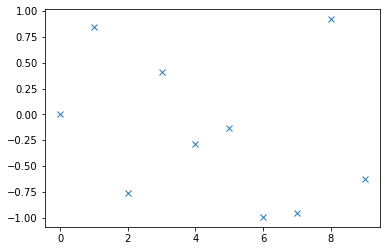

In [17]:
u1=np.zeros(10)
for k in range(10):
    u1[k]=np.sin(k**2)
plt.plot(u1, 'x')

Le second code ci-dessous fait de même mais construit le tableau de valeurs avec un code plus court, en utilisant la fonction `numpy.arange` puis en utilisant le fait qu'on peut appliquer une fonction de Numpy comme `numpy.sin` à un tableau, avec pour résultat d'avoir appliqué la fonction à toutes les entrées du tableau :

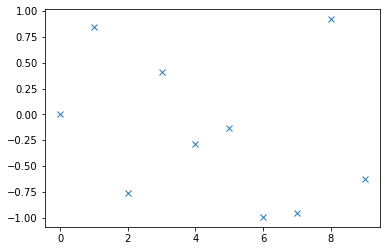

In [18]:
u2=np.sin(np.arange(0,10,1)**2)
plt.plot(u2, 'x')

## Représentation de fonctions et de courbes

La fonction `plot(x,y)` représente les points dont les abcisses sont données par le vecteur $x$ et les ordonnées par le vecteur $y$, obtenue ensuite par interpolation linéaire par morceaux.

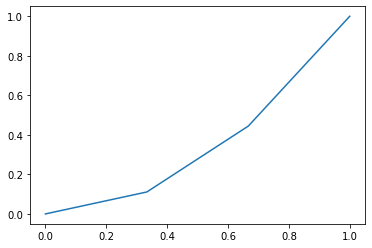

In [21]:
x4 = np.linspace(0,1,4)
y4 = x4**2
plt.plot(x4,y4)
plt.show()

On peut modifier la représentation des graphiques, en utilisant `xlabel`, `ylabel` et `title` pour donner un nom à l'axe des $x$, l'axe des $y$, et donner un titre à la figure par exemple. Pour tracer la courbe de $f(x)=x^3-x^2+x-1$ pour $x\in [0,2]$ en labellisant les x "abscisses", les y "ordonnées" et en donnant pour titre "graphe de $x^3-x^2+x-1$", on procède comme suit :

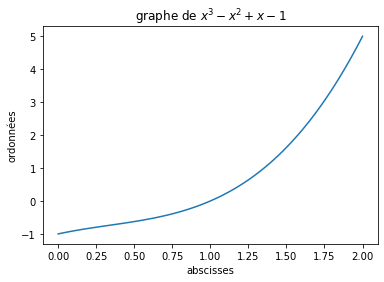

In [22]:
x5=np.linspace(0,2,100)
y5=x5**3-x5**2+x5-1
plt.xlabel(r'abscisses')
plt.ylabel(r'ordonnées')
plt.title(r'graphe de $x^3-x^2+x-1$')
plt.plot(x5,y5)

**Exercice résolu.**
Tracer simultanément les approximations successives par la formule de Taylor en 0 de la fonction exponentielle $f_1(x)=1$, $f_2(x)=1+x$,
$f_3(x)=1+x+\frac{x^2}{2}$ et $f_4(x)=1+x+\frac{x^2}{2}$ pour $x\in [-2,2]$. Faire apparaître le nom de chaque fonction sur le graphique.

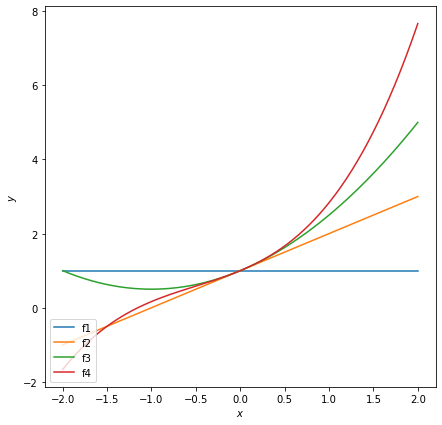

In [23]:
x6 = np.linspace(-2,2,200)
f6_1=np.ones(200)
f6_2=f6_1+x6
f6_3=f6_2+(x6**2)/2
f6_4=f6_3+(x6**3)/3
plt.figure(figsize=(7,7))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(x6, f6_1, label="f1")
plt.plot(x6, f6_2, label="f2")
plt.plot(x6, f6_3, label="f3")
plt.plot(x6, f6_4, label="f4")
plt.legend(loc='lower left')    # Pensez à utiliser plt.legend pour être sûr que vos labels de fonctions s'affichent
plt.show()

# Exercices

**Exercice 4.**
1. Donner le vecteur $u$ qui contient les 100 premiers termes de la suite de Fibonnaci definie par $u_0=0$, $u_1=1$ et $u_{k+1}=u_k+u_{k-1}$ pour $k\geq 2$.
2. Donner le vecteur des 98 premiers rapports successifs $v_k=u_{k+1}/u_{k}$.
3. Représenter graphiquement la suite $(v_k)_{k\in \mathbb N}$. Voit-on qu'elle converge ?

**Exercice 5.**
 Tracer la courbe de la gaussienne sur $[-10,10]$. Pour utiliser le nombre $\pi$, vous pouvez utiliser `numpy.pi` ou bien `math.pi` (pour cette deuxième manière assurez-vous d'avoir auparant appelé le module `math`).

**Exercice 6.**
1. Tracer simultanément les courbes des fonctions $f(x) = x\sin(1/x)$ et $g(x) = \exp(−1/x^2)$ sur un même voisinage de $0$.
2. Ont-elles l'air continues ?


**Exercice 7.**
Tracer simultanément les courbes des fonctions $f_k(x)=\cos(kx)$ et $g_k(x)=\sin(kx)$ pour $k=1,2,3$ et $x\in [0,2\pi]$. Faire apparaître un label différent pour chaque courbe.

**Exercice 8.**
Tracer la courbe paramétrée $\gamma_1=(\cos(2t)+2\cos(t),\sin(2t)+2\sin(t))$ pour $t\in [0,2\pi]$

**Exercice 9.** Tracer la courbe paramétrée $\gamma_2=(\cos(4t),\sin(4t),t)$ et la surface $z(x,y)=\cos(x-2y)\sin(2x+y)$